In [6]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML

%matplotlib inline

#### IMPORTANTE:

Para executar este exemplo, é necessário instalar a biblioteca ffmpeg com o comando: pip install ffmpeg

In [7]:
#!pip install ffmpeg

In [5]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
seed = 1234
np.random.seed(seed)

### Definição de funções úteis

In [3]:
def calculateErrorSurface(X, y):
    """
    Generate data points for plotting the error surface.
    """
    # Generate values for parameter space.
    N = 200
    a0 = np.linspace(-10.0, 14.0, N)
    a1 = np.linspace(-10.0, 14.0, N)

    A0, A1 = np.meshgrid(a0, a1)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A0[iter1][iter2] + A1[iter1][iter2]*X
            J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - yhat))
            
    return J, A0, A1
            
def calculateClosedFormSolution(X, y):
    """
    Calculate closed-form solution using the normal equation.
    """
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = X.dot(a_opt)
    Joptimum = (1.0/M)*np.sum(np.power((y - yhat), 2))
    
    return Joptimum, a_opt

def batchGradientDescent(alpha, n_iterations, X_b, y):
    """
    Batch gradient descent solution.
    """
    # Initialize error history with zeros.
    Jgd = np.zeros(n_iterations+1)
    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)
    
    yhat = X_b.dot(a)
    Jgd[0] = (1.0/M)*np.sum(np.power(y - yhat, 2))

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        
        h = X_b.dot(a)
        
        gradients = -(2.0/M)*X_b.T.dot(y - h)
        
        a = a - alpha * gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        
        yhat = X_b.dot(a)

        Jgd[iteration+1] = (1.0/M)*sum(np.power((y - yhat), 2))

        error = np.abs(Jgd[iteration]-Jgd[iteration+1])
        
    return a, a_hist, Jgd, iteration

def h(X_b, a):
    """
    Hypothesis Function
    """    
    return a.T.dot(X_b.T)

### Geração do conjunto de dados

In [4]:
# Number of examples.
M = 1000

# Input values (features)
X = np.random.rand(M, 1)

# True function/model.
y = 2.0 + 2.0 * X

# Observable (noisy) function.
y_noisy = y + np.random.randn(M, 1)

### Visualizando o conjunto de dados

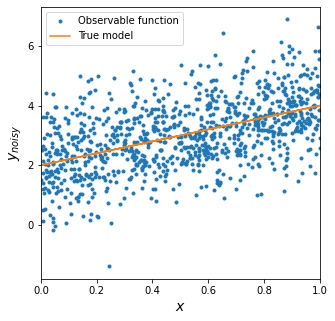

In [5]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
plt.plot(X, y_noisy, '.', label='Observable function')
plt.plot(X, y, label='True model')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y_{noisy}$', fontsize=14)
plt.legend()
plt.xlim(0,1)
#Show the plot.
plt.show()

### Plotando a superfície de erro

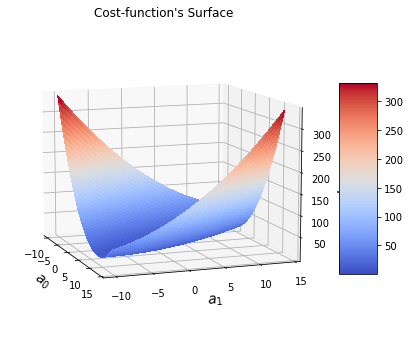

In [6]:
# Calculate data point for plotting error surface.
J, A0, A1 = calculateErrorSurface(X, y_noisy)

# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(10, -20)
# Save figure into file.
#plt.savefig("error_surface_bgd.png", dpi=600)
#Show the plot.
plt.show()

### Encontrando o ponto de mínimo com a equação normal

In [7]:
# add x0 = 1 to each instance.
X_b = np.c_[np.ones((M, 1)), X]
    
# Calculate closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X_b, y_noisy)

print('a0:', a_opt[0][0])
print('a1:', a_opt[1][0])
print('Joptimum:', Joptimum)

a0: 2.0331312783699023
a1: 1.9640251910294566
Joptimum: 0.994060499872569


### Encontrando o ponto de mínimo com o gradiente descendente

In [8]:
# learning rate
alpha = 0.3

# Number of iterations.
n_iterations = 1000

# Run batch gradient-descent algorithm.
a, a_hist, Jgd, iteration = batchGradientDescent(alpha, n_iterations, X_b, y_noisy)

### Plotando a superfície de contorno com o histórico de atualizações dos pesos

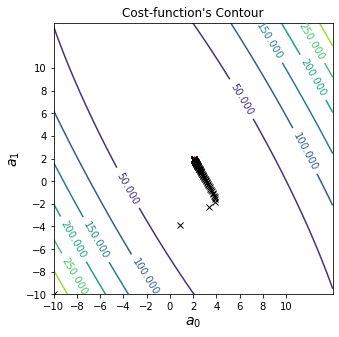

In [17]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:n_iterations], a_hist[1, 0:n_iterations], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
# save figure into file.
#plt.savefig("error_contour_bgd.png", dpi=600)
plt.show()

### Gráfico com número de iterações versus o erro

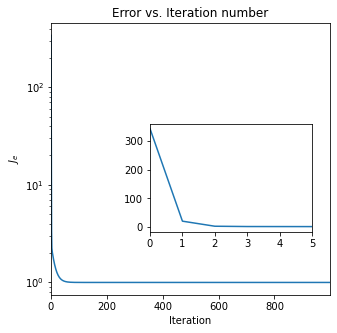

In [28]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')

left, bottom, width, height = [0.4, 0.3, 0.45, 0.3]
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(np.arange(0, iteration), Jgd[0:iteration])
ax1.set_xlim(0, 5)

plt.show()

### Ajuste de Curva Animada

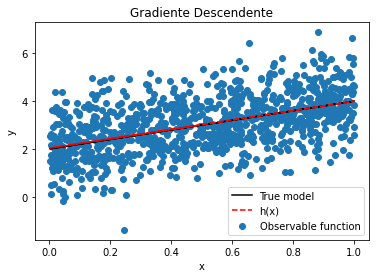

In [11]:
fig, ax = plt.subplots()
plt.scatter(X, y_noisy, label='Observable function')
plt.plot(X, y, 'k', label='True model')
xl = []
yl = []
ln, = plt.plot(xl, yl, 'r--', animated=True, label='h(x)')
plt.title('Gradiente Descendente')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend()
    return ln,

def update(frame):
    theta = np.zeros((2,1))
    theta[0] = a_hist[0,frame]
    theta[1] = a_hist[1,frame]
    f = functools.partial(h, a=theta)
    y = f(X_b)
    ln.set_data(X, y)
    return ln,

# Create animated figure.
ani = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=300)
# Display the animated figure.
display(HTML(ani.to_html5_video()))

# Save the animated figure.
#ani.save('animated_linear_regression.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

###  Histórico de ajuste dos pesos animado

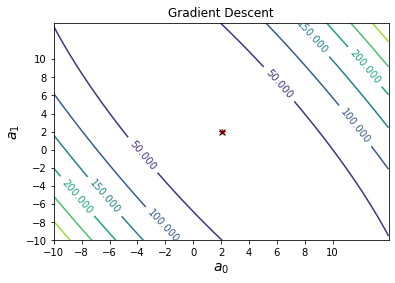

In [12]:
fig, ax = plt.subplots()
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
xl = []
yl = []
ln, = plt.plot(xl, yl, 'kx', animated=True)
plt.title('Gradient Descent')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))

def init():
    ax.set_xlabel('$a_0$', fontsize=14)
    ax.set_ylabel('$a_1$', fontsize=14)
    return ln,

def update(frame):
    ln.set_data(a_hist[0, frame], a_hist[1, frame])
    return ln,

ani2 = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=1000)
display(HTML(ani2.to_html5_video()))

#ani2.save('animated_linear_regression_contour.mp4', fps=30, extra_args=['-vcodec', 'libx264'])